In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile(r'/content/AugmentedAlzheimerDataset.zip','r') as zipobj:
  zipobj.extractall(r'/content/')

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten ,Conv2D, MaxPooling2D
from keras.optimizers import Adam

import sklearn.metrics as metrics

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
MildDemented_dir = r'/content/AugmentedAlzheimerDataset/MildDemented'
ModerateDemented_dir = r'/content/AugmentedAlzheimerDataset/ModerateDemented'
NonDemented_dir = r'/content/AugmentedAlzheimerDataset/NonDemented'
VeryMildDemented_dir = r'/content/AugmentedAlzheimerDataset/VeryMildDemented'

filepaths = []
labels = []

dict_list = [MildDemented_dir, ModerateDemented_dir, NonDemented_dir, VeryMildDemented_dir]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']


for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])


Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="Labels")
Alzheimer_data = pd.concat([Fseries, Lseries], axis=1)
Alzheimer_df = pd.DataFrame(Alzheimer_data)

print(Alzheimer_df.head())
print(Alzheimer_df["Labels"].value_counts())

                                           filepaths         Labels
0  /content/AugmentedAlzheimerDataset/MildDemente...  Mild Demented
1  /content/AugmentedAlzheimerDataset/MildDemente...  Mild Demented
2  /content/AugmentedAlzheimerDataset/MildDemente...  Mild Demented
3  /content/AugmentedAlzheimerDataset/MildDemente...  Mild Demented
4  /content/AugmentedAlzheimerDataset/MildDemente...  Mild Demented
Labels
Non Demented         9600
Mild Demented        8960
Very MildDemented    8960
Moderate Demented    6464
Name: count, dtype: int64


In [ ]:
Alzheimer_df.shape

(33984, 2)

In [ ]:
train_images, test_images = train_test_split(Alzheimer_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(train_images, test_size=0.2, random_state=42)
#56% train
#14% validate
#30% test

In [ ]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(19030, 2)
(10196, 2)
(4758, 2)
(23788, 2)


In [ ]:
image_gen = ImageDataGenerator(rescale=1./255)


train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="Labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size=100,
                                      shuffle=False
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="Labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=100,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="Labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=100,
                                    shuffle=False
                                   )

Found 19030 validated image filenames belonging to 4 classes.
Found 10196 validated image filenames belonging to 4 classes.
Found 4758 validated image filenames belonging to 4 classes.


In [ ]:
classes=train.class_indices
classes

{'Mild Demented': 0,
 'Moderate Demented': 1,
 'Non Demented': 2,
 'Very MildDemented': 3}

In [ ]:
test.class_indices

{'Mild Demented': 0,
 'Moderate Demented': 1,
 'Non Demented': 2,
 'Very MildDemented': 3}

In [ ]:
val.class_indices

{'Mild Demented': 0,
 'Moderate Demented': 1,
 'Non Demented': 2,
 'Very MildDemented': 3}

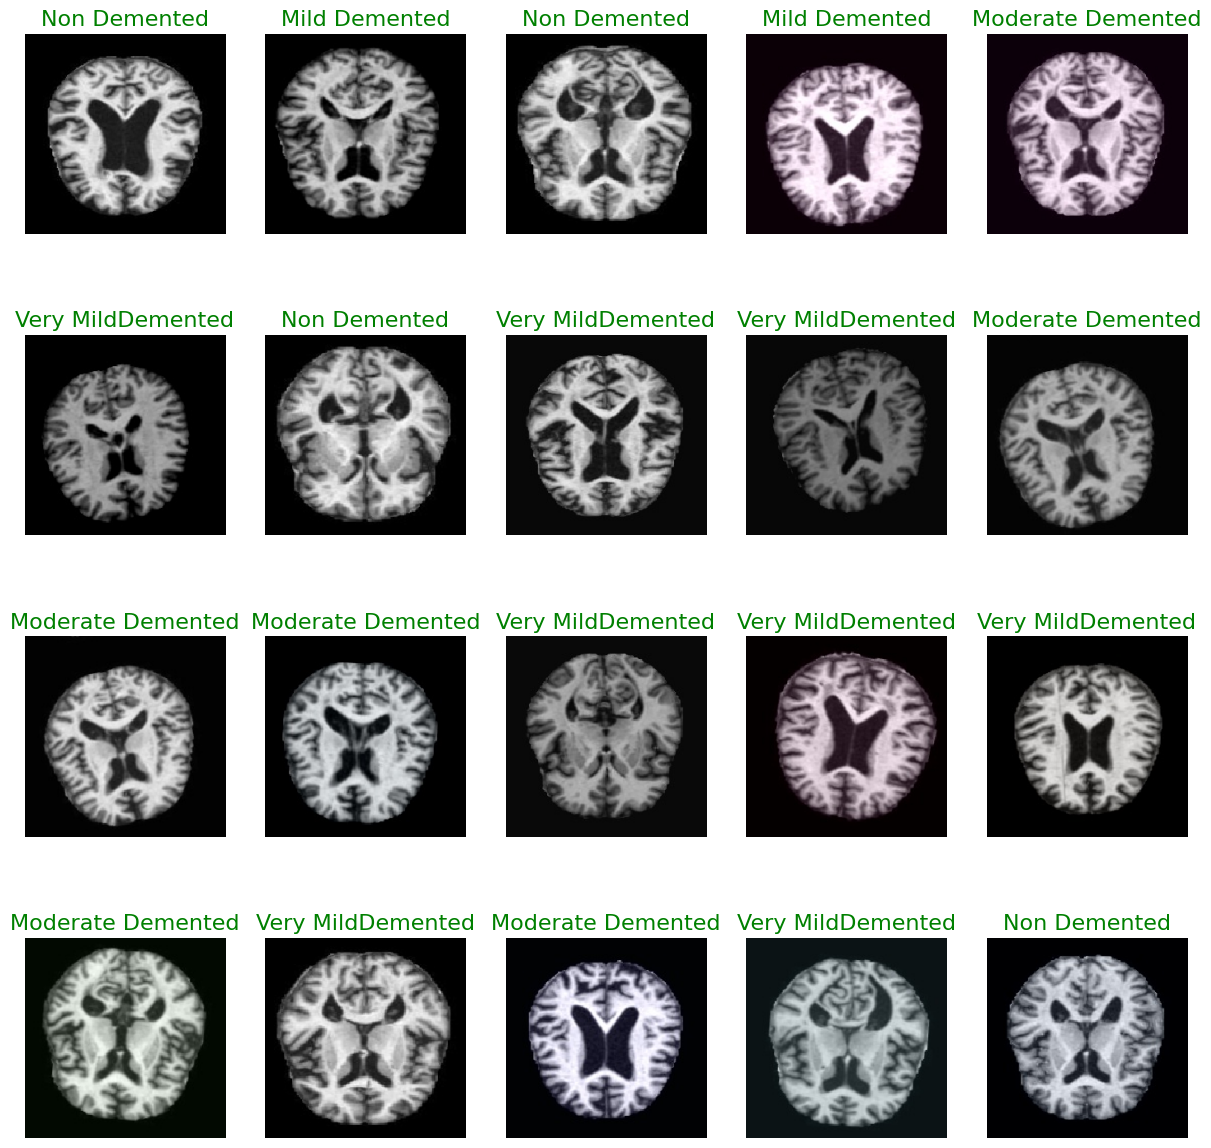

In [ ]:
test_dict = test.class_indices
classes = list(test_dict.keys())
images, labels=next(test)
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i])
    index=np.argmax(labels[i]) # [0,0,0,1]
    class_name=classes[index]
    plt.title(class_name, color="green",fontsize=16)
    plt.axis('off')
plt.show()

In [ ]:
model = Sequential([

    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'] # Accuracy as metric
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 73, 73, 128)         │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 73, 73, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 12, 12, 512)         │           2,0

 Total params: 15,611,524 (59.55 MB)

 Trainable params: 15,605,124 (59.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [ ]:
history = model.fit(train, epochs=15, validation_data=val, validation_freq=1)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 171s 827ms/step - accuracy: 0.3071 - loss: 2.6106 - val_accuracy: 0.2997 - val_loss: 1.5136
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 177s 723ms/step - accuracy: 0.4001 - loss: 1.2281 - val_accuracy: 0.2533 - val_loss: 1.4528
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 139s 722ms/step - accuracy: 0.4107 - loss: 1.1795 - val_accuracy: 0.2350 - val_loss: 1.5218
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 141s 719ms/step - accuracy: 0.4754 - loss: 1.0997 - val_accuracy: 0.2524 - val_loss: 1.4248
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 140s 721ms/step - accuracy: 0.5515 - loss: 0.9716 - val_accuracy: 0.6440 - val_loss: 0.7963
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 142s 722ms/step - accuracy: 0.6247 - loss: 0.8181 - val_accuracy: 0.6145 - val_loss: 0.8261
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 139s 720ms/step - accuracy: 0.6603 - loss: 0.7564 - val_accuracy: 0.5221 - val_loss: 0.9107
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 143s 722ms/step - accuracy: 0.7039 - loss: 0.65

In [ ]:
model.evaluate(test)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 395ms/step - accuracy: 0.8930 - loss: 0.2738


[0.2761959433555603, 0.8891721963882446]

In [ ]:
model.save("Alzheimer_Model_binary.h5")

In [ ]:
pred = model.predict(test)

102/102 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step


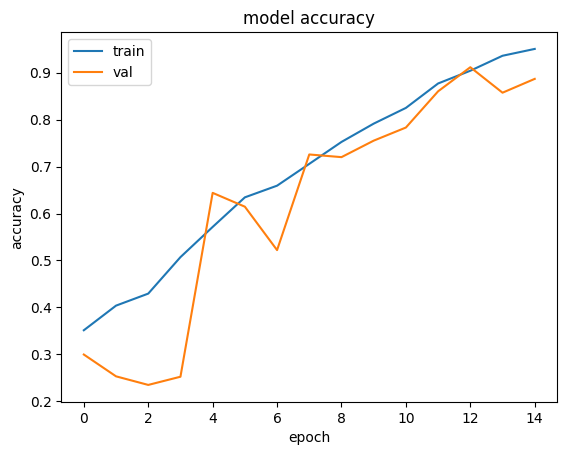

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

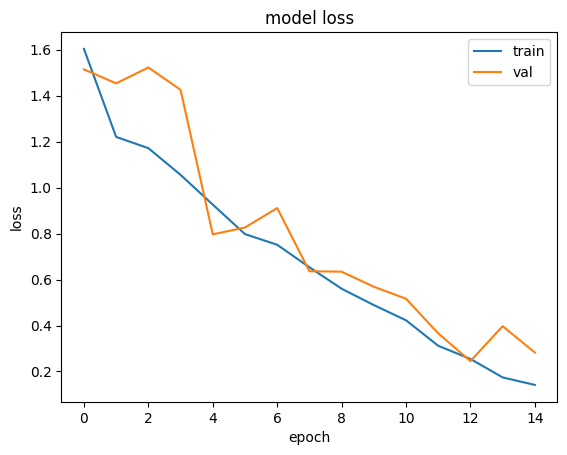

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()